<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/110_intro_prob.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(intro_prob_notebook)=
# Introduzione al calcolo delle probabilità

Una definizione di inferenza bayesiana è l'applicazione della teoria delle probabilità ai problemi di inferenza statistica. Pertanto, è fondamentale comprendere la teoria delle probabilità per apprendere l'inferenza bayesiana.

L'inferenza bayesiana è un approccio statistico che si basa sul teorema di Bayes per aggiornare le credenze o le probabilità su un'ipotesi data a seguito dell'osservazione di dati empirici. Questo processo richiede una solida comprensione della teoria delle probabilità, in quanto le probabilità sono fondamentali per quantificare le incertezze e le relazioni tra variabili nel contesto dell'inferenza bayesiana.

In questo capitolo, esamineremo diverse concezioni della probabilità, tra cui la visione classica, frequentista e bayesiana. Approfondiremo anche argomenti come le variabili casuali, le funzioni di massa di probabilità e le funzioni di ripartizione. Inoltre, introdurremo la simulazione con Python per comprendere la legge dei grandi numeri, un concetto fondamentale nell'ambito della probabilità.

Prima di procedere, è indispensabile leggere l'appendice dedicata al {ref}`combinatorics-notebook`.

## Preparazione del Notebook

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools as it
import math
import scipy.stats as stats
import arviz as az
import seaborn as sns
from collections import Counter

In [7]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Storia della probabilità

La probabilità è un modo formale di quantificare l'incertezza, assegnando plausibilità o credibilità a un insieme di possibilità mutuamente esclusive o risultati di un esperimento o osservazione. La storia della probabilità è lunga e complessa, come illustrato in varie opere (Tabak 2004, Stigler 1986, Weisberg 2014). L'origine della probabilità moderna risale a una domanda posta da Antoine Gombaud (Chevalier de Méré) a Blaise Pascal (1623–1652) su come dividere equamente le puntate di un gioco di carte interrotto. Il problema può essere così formulato (si veda la formulazione esatta su [Wikipedia](https://en.wikipedia.org/wiki/Problem_of_points)):

> Immaginiamo due persone che partecipano a un gioco a più round. In ogni round, entrambe le persone hanno la stessa probabilità di vincere. La prima persona che vince sei round consecutivi si aggiudicherà un ricchissimo premio in denaro. Ora, supponiamo che A e B abbiano già disputato sei round, con A che ha vinto cinque volte e B una volta. In quel momento, il gioco è stato interrotto a causa di un temporale. Poiché né A né B hanno raggiunto le sei vittorie, anziché assegnare il premio a uno di loro, hanno deciso di dividerlo. Ma qual è il modo più equo per farlo?

La discussione tra Pierre de Fermat (1607–1655) e Pascal ha portato alla formalizzazione dell'utilizzo della matematica per risolvere questo problema. In sostanza, una soluzione proposta consiste nel considerare le probabilità di vincita di ciascun giocatore. Ad esempio, se A ha una probabilità del 97% di vincere il premio alla fine e B ha una probabilità del 3%, allora sembrerebbe equo assegnare ad A il 97% del premio. L'interesse pubblico per la loro corrispondenza è sopravvissuto grazie al libro di Christian Huygens del 1657 "De Ratiociniis in Ludo Aleae" (Sul Ragionamento nei Giochi di Dadi), che è rimasto il riferimento per la probabilità per circa 50 anni.

Il libro postumo di Jacob Bernoulli, "L'Arte della Congettura" (1713), ha segnato una svolta nella storia della probabilità. Bernoulli ha definito la probabilità come un indice di incertezza compreso tra 0 e 1 e ha collegato il calcolo della probabilità ai dati e alla frequenza a lungo termine di un evento, noto come legge dei grandi numeri. Bernoulli ha applicato la probabilità anche a settori diversi dal gioco d'azzardo, come la mortalità umana e la giustizia penale, creando la cosiddetta "probabilità soggettiva".

### Collegamento tra Probabilità e Statistica

La storia della probabilità termina intorno agli anni '20 del Novecento, quando Ronald A. Fisher formulò un nuovo quadro teorico per l'inferenza statistica basata sulla frequenza. Fisher ha introdotto concetti come massima verosimiglianza, test di significatività, metodi di campionamento, analisi della varianza e design sperimentale. Il suo lavoro ha segnato una svolta fondamentale nella teoria e nei metodi statistici.

Negli anni '30, Jerzy Neyman e Egon Pearson hanno sviluppato una teoria della decisione statistica, basata sul principio della verosimiglianza e sull'interpretazione frequentista della probabilità. Hanno definito due tipi di errore decisionale e utilizzato il test di significatività di Fisher, interpretando i valori p come tassi di errore a lungo termine.

### La riscoperta dei metodi Monte Carlo Markov chain negli anni '80

Fisher ha sviluppato una visione critica della "probabilità inversa" (i metodi bayesiani), nonostante fosse stata la metodologia principale per l'inferenza statistica per quasi 150 anni. La sua visione frequentista ha avuto un forte impatto sullo sviluppo della statistica teorica e sperimentale, portando a un declino dell'inferenza basata sul metodo di probabilità inversa di Laplace.

Nel frattempo, il libro di Harold Jeffreys del 1939, "Theory of Probability", ha rappresentato la prima esposizione moderna dei metodi bayesiani, ma la rinascita del framework bayesiano ha dovuto attendere fino alla riscoperta dei metodi Monte Carlo Markov chain alla fine degli anni '80, che hanno reso possibili calcoli precedentemente irrealizzabili.

## Che cos'è la probabilità?

Esistono due punti di vista relativi al significato del concetto di probabilità.

- Secondo una prospettiva che possiamo chiamare "ontologica", la probabilità è considerata come una proprietà intrinseca del mondo, indipendente dalla nostra esperienza. In questa visione, la probabilità è vista come una caratteristica oggettiva del mondo stesso.
- D'altra parte, la prospettiva "epistemica" vede la probabilità come una misura della nostra conoscenza del mondo anziché una proprietà oggettiva. Questa visione soggettiva della probabilità dipende dalla nostra conoscenza e dal nostro punto di vista.

### Interpretazione classica

La prima definizione di probabilità è stata proposta da Pierre-Simon Laplace (1749-1827), che si è avvalso del calcolo combinatorio. Secondo Laplace, la probabilità $P$ di un evento è definita come il rapporto tra il numero di casi in cui l'evento si verifica e il numero totale di casi possibili. In questa definizione, un evento è qualcosa a cui è possibile assegnare un valore di verità, ovvero qualcosa che può essere vero o falso. Ad esempio, la probabilità di ottenere un 3 in un lancio di un singolo dado è 1/6 ≃ 0.17, poiché c'è un solo caso favorevole (il lancio ha prodotto un 3) su sei casi possibili (i numeri da 1 a 6). Tuttavia, questa definizione è insoddisfacente in quanto si basa sull'assunzione che ogni evento sia equiprobabile, il che non è sempre vero. Inoltre, questa definizione è circolare poiché per definire il concetto di probabilità, è necessario prima definire cosa significa che gli eventi siano equiprobabili, e quindi si deve già conoscere il concetto di probabilità.

### Interpretazione frequentista

Un secondo tentativo di definire la probabilità si basa sull'approccio frequentista, che può essere attribuito a molti autori. In questo approccio, la probabilità è definita sulla base delle frequenze osservate dell'occorrenza di un evento. Questo approccio nasce dalla difficoltà di assegnare una probabilità agli eventi assumendo il principio di equiprobabilità, come nel caso dei dadi o delle carte di un mazzo. Sebbene la probabilità di ottenere 3 come risultato del lancio di un dado sia 1/6 se crediamo che il dado sia bilanciato, se così non fosse non potremmo assegnare la stessa probabilità a tutti i risultati possibili. Tuttavia, possiamo stimare le probabilità come la frequenza $f_3$, definita come il rapporto tra il numero di volte in cui un lancio ha prodotto 3 e il numero totale di lanci.

Si osservi che l'osservazione della frequenza $f_3$ è solo un' approssimazione della probabilità, ma l'accuratezza migliora all'aumentare del numero totale di lanci, $N$. In linea di principio, la probabilità di ottenere 3, $P(3)$, è il limite della frequenza $f_3$ quando il numero totale di lanci $N$ tende all'infinito. Tuttavia, questa definizione richiede l'infinita ripetizione di un esperimento, il che può essere impraticabile o impossibile in molti casi. Inoltre, questa definizione assume che gli eventi futuri siano simili agli eventi passati, il che non è sempre garantito.

#### Problema del caso singolo

A causa dell'approccio frequentista, che fa riferimento alla frequenza relativa di eventi nel lungo periodo, non è concettualmente corretto parlare della probabilità di eventi che non sono ripetibili. Per esempio, sarebbe inappropriato discutere della probabilità che Alcarez sconfigga Djokovic nella finale di Wimbledon del 2023 o della probabilità che piova a Firenze nel giorno di Ferragosto del 2024, dato che si tratta di eventi specifici e irripetibili. Tuttavia, è frequente che persone non esperte nel campo utilizzino il termine 'probabilità'  per descrivere tali eventi.

### Interpretazione soggettivista

Una visione alternativa della probabilità la considera come una credenza soggettiva. {cite:t}`de2017theory` ha proposto un'interpretazione in cui la probabilità non è vista come una caratteristica oggettiva degli eventi, ma piuttosto come una misura della credenza soggettiva, suggerendo di trattare $p(·)$ come una probabilità soggettiva. È interessante notare che de Finetti era un soggettivista radicale. Infatti, la frase di apertura del suo trattato in due volumi sulla probabilità afferma che "La probabilità non esiste", intendendo che la probabilità non ha uno status oggettivo, ma rappresenta piuttosto la quantificazione della nostra esperienza di incertezza. Riteneva che l'idea di una probabilità esterna all'individuo, con uno status oggettivo, fosse pura superstizione, paragonabile al credere in "Etere cosmico, Spazio e Tempo assoluti, ..., o Fate e Streghe...". Secondo {cite:t}`de2017theory`, "... esistono solo probabilità soggettive - cioè, il grado di credenza nell'occorrenza di un evento attribuito da una determinata persona in un dato momento con un dato insieme di informazioni." 

Come sottolineato da {cite:t}`press2009subjective`, la prima menzione della probabilità come grado di credenza soggettiva fu fatta da {cite:t}`ramsey1926truth`, ed è questa nozione di probabilità come credenza soggettiva che ha portato a una notevole resistenza alle idee bayesiane. Una trattazione dettagliata degli assiomi della probabilità soggettiva si trova in {cite:t}`fishburn1986axioms`.

La denominazione "soggettivo" legata alla probabilità potrebbe risultare infelice, poiché potrebbe suggerire un ragionamento vago o non scientifico. {cite:t}`lindley2013understanding` condivide queste riserve, proponendo l'alternativa "probabilità personale" rispetto a "probabilità soggettiva". Analogamente, {cite:t}`howson2006scientific` preferiscono utilizzare l'espressione "probabilità epistemica", che riflette il grado di incertezza di un individuo di fronte al problema trattato. In sostanza, la probabilità epistemica si riferisce all'incertezza personale riguardo a variabili sconosciute. Questa terminologia viene adottata anche nel testo di {cite:t}`kaplan2023bayesian`, fornendo un linguaggio più neutro per discutere di questi concetti.

Va inoltre notato che l'interpretazione soggettiva si adatta bene a eventi singoli, permettendo di esprimere una convinzione su eventi specifici, come la probabilità di pioggia in un dato giorno o l'esito di una competizione sportiva.

```{admonition} Nota
Per chi desidera approfondire, un'introduzione molto leggibile alle tematiche della definizione della probabilità nella storia della scienza è fornita nel primo capitolo del testo *Bernoulli's fallacy* {cite:p}`clayton2021bernoulli`.
```

## Concetti di base 

Esaminiamo qui di seguito alcuni concetti di base della teoria delle probabilità.

### Esperimento casuale ed eventi 

Nella teoria delle probabilità, un *esperimento casuale* è un processo o una situazione in cui il risultato non può essere previsto con certezza prima dell'esecuzione stessa dell'esperimento. Per poter analizzare in modo appropriato gli esperimenti casuali, sono fondamentali alcune nozioni chiave.

1. Il concetto di *spazio campionario* si riferisce all'insieme completo di tutti i potenziali risultati che potrebbero emergere da un esperimento casuale. Questo insieme è spesso rappresentato con il simbolo $\Omega$. Ad esempio, nel contesto di un esperimento casuale come il lancio di un dado, il nostro spazio campionario $\Omega$ sarebbe costituito da un insieme di risultati possibili: $\Omega = \{\omega_1, \omega_2, \omega_3, \omega_4, \omega_5, \omega_6\}$. Qui, ogni $\omega_i$, con $i = 1, \dots, 6$, rappresenta uno dei risultati osservabili possibili durante l'esperimento.

2. Un *evento elementare* è la rappresentazione di un singolo risultato all'interno dello spazio campionario, $\omega \in \Omega$. Questi eventi elementari costituiscono gli elementi fondamentali da cui sono composti gli altri eventi. Solitamente vengono identificati mediante simboli come $\omega_1$, $\omega_2$, e così via.

3. Un *evento* può essere descritto come un insieme di risultati all'interno dello spazio campionario e rappresenta una collezione di eventi elementari. Questo insieme può comprendere uno o più eventi elementari ed è solitamente indicato mediante simboli come $A$, $B$, e così via. Per esempio, $E = \{\omega \in \Omega : \omega \text{ è dispari}\}$.

```{admonition} Il punto di vista bayesiano
Nella statistica bayesiana, consideriamo un risultato di un esperimento casuale come una rappresentazione dello stato sottostante del mondo. Tuttavia, esiste un'incertezza intrinseca: non disponiamo di conoscenze complete su quale risultato specifico corrisponda al vero stato del mondo.

Le nostre osservazioni forniscono informazioni parziali sullo stato del mondo o sul risultato. Queste informazioni ci consentono di escludere i risultati che non sono coerenti con le nostre osservazioni. Tuttavia, anche dopo questo processo di esclusione, rimangono molteplici risultati potenziali che potrebbero ancora essere plausibili.

È qui che entra in gioco la teoria delle probabilità. L'inferenza bayesiana utilizza la teoria delle probabilità per quantificare e gestire l'incertezza residua. Ci consente di assegnare probabilità ai vari risultati plausibili, riflettendo il nostro livello di convinzione o incertezza su ciascuno di essi. In questo modo, possiamo prendere decisioni informate, fare previsioni o trarre conclusioni basate su una comprensione probabilistica del mondo.
```

Per esprimere il verificarsi di eventi congiunti (eventi "compatibili"), utilizziamo il connettivo logico "e" ($\land$) e la probabilità della loro intersezione è indicata come $P(A \cap B)$ o $P(A, B)$. Mentre per gli eventi disgiunti (eventi "incompatibili"), in cui i due eventi non possono verificarsi contemporaneamente, usiamo il connettivo logico "o" ($\lor$) e la probabilità della loro unione è $P(A \cup B) = 0$.

I valori di probabilità $P(A) = 0$ rappresentano eventi impossibili, mentre $P(A) = 1$ rappresentano eventi certi.

Per denotare la probabilità che un evento $A$ non si verifichi, possiamo usare la notazione $P(\lnot A)$ o $P(\bar{A})$, dove $P(\bar{A}) = 1 - P(A)$.

Per esemplificare, prendiamo in considerazione l'esperimento casuale del lancio di un dado. I singoli risultati elementari, rappresentati come $\omega$, sarebbero i singoli numeri, come {1}, {2}, {3}, e così via. D'altro canto, gli eventi possono essere formati da insiemi di questi risultati elementari. Per esempio, l'evento A, che rappresenta "ottenere un numero dispari," sarebbe espresso come l'insieme A = {1, 3, 5}, mentre l'evento B, che indica "ottenere un numero maggiore di 4," sarebbe rappresentato come l'insieme B = {5, 6}. Se focalizziamo la nostra attenzione sull'evento "dispari," il dado potrebbe mostrare come risultato il 3, l'1 o il 5, e ciascuno di questi risultati verificherebbe l'evento "dispari."

Si può affermare che $E_1, E_2, \ldots$ costituisce una partizione di $E$ quando:

- Gli insiemi $E_i$ sono disgiunti, ossia $E_i \cap E_j = \emptyset$ per ogni $i$ diverso da $j$,
- La loro unione è l'insieme completo $E$, ovvero $E_1 \cup E_2 \cup \ldots = E$.

### Assiomi della probabilità

Ci sono tre assiomi fondamentali della probabilità, dai quali possiamo derivare l'intera teoria delle probabilità.

```{admonition} Assiomi
:class: note
1. La probabilità di qualsiasi evento A è non negativa. In notazione matematica, possiamo esprimerlo come: $P(A) \geq 0$, dove P indica la "probabilità di" e A rappresenta l'evento.

2. La probabilità dell'intero spazio campionario è pari a 1. In altre parole, la somma delle probabilità di tutti gli eventi elementari è uguale a 1: $P(\text{spazio campionario}) = 1$.

3. Se gli eventi $A_1, A_2, \ldots, A_n$ sono mutuamente esclusivi (ovvero, non possono verificarsi contemporaneamente), allora la probabilità che almeno uno di essi si verifichi è la somma delle probabilità di ciascun evento: 
$P(A_1 \cup A_2 \cup \ldots \cup A_n) = P(A_1) + P(A_2) + \ldots + P(A_n)$.
```

### Variabili casuali

Le variabili casuali vengono utilizzate come elementi fondamentali in due principali contesti nella statistica bayesiana: la modellazione delle "conoscenze" (osservazioni) e delle "incognite" (variabili latenti/parametri/predizioni).

Nel contesto della modellazione delle "conoscenze", le variabili casuali sono impiegate per rappresentare le osservazioni o i dati noti. Questo significa che si utilizzano per descrivere quantitativamente le informazioni a nostra disposizione, come i dati sperimentali o le osservazioni effettive.

D'altra parte, nel contesto delle "incognite", le variabili casuali vengono utilizzate per rappresentare le incertezze o i parametri non osservati di un modello statistico. Queste variabili latenti possono rappresentare quantità sconosciute, come i valori dei parametri di un modello probabilistico o le previsioni future del modello.

```{admonition} Definizione
:class: note
Una variabile casuale reale può essere definita come una funzione che associa elementi di uno spazio campionario $\Omega$ a valori reali, formalmente espressa come $X : \Omega \rightarrow \mathbb{R}$.
```

Per comprendere meglio questa definizione, possiamo considerare un esempio pratico come il lancio di un dado. In ogni lancio, otteniamo un esito concreto nel mondo fisico. Tuttavia, la teoria della probabilità ci permette di considerare tutti i possibili esiti che avrebbero potuto verificarsi. Per facilitare l'analisi e i calcoli in questa teoria, si utilizzano le variabili casuali, che rappresentano gli eventi mediante valori numerici.

Ad esempio, se denotiamo con $Y$ la variabile casuale relativa all'esito di un lancio di dado, ogni valore di $Y$ corrisponderà a un possibile esito. Si può specificare che $Y = 1$ rappresenti l'evento in cui il dado mostra un numero dispari sulla faccia superiore. In questo modo, trasformiamo l'evento fisico del lancio del dado in una rappresentazione numerica, semplificando l'analisi statistica e probabilistica dell'evento.

Le variabili casuali possono essere di due tipi: discrete o continue. Una variabile casuale discreta può assumere solo un numero finito o numerabile di valori distinti, come ad esempio i risultati di un test psicometrico con punteggi specifici su una scala Likert. In questo caso, i valori possibili della variabile casuale sono rappresentati da $x_1, \dots, x_n$, corrispondenti agli eventi $E_1, \dots, E_n$, che si verificano con le rispettive probabilità $p_1, \dots, p_n$. D'altra parte, una variabile casuale continua può assumere un numero infinito di valori all'interno di un intervallo specifico. Un esempio di variabile casuale continua è la distanza tra due punti, poiché può variare in modo continuo tra un valore minimo e massimo all'interno dell'intervallo considerato.

#### Notazione

Nella teoria della probabilità, è comune rappresentare le variabili casuali utilizzando lettere maiuscole. Ad esempio, la lettera 'X' può essere usata per indicare una variabile casuale. Allo stesso modo, la corrispondente lettera minuscola, in questo caso 'x', viene impiegata per denotare una specifica realizzazione di quella variabile casuale. Quest'ultima, definita come "realizzazione", rappresenta un singolo esito o valore che la variabile casuale può assumere.

È importante notare che questa convenzione di utilizzo delle lettere maiuscole e minuscole non è universalmente adottata in tutti i campi. In particolare, nella letteratura della statistica bayesiana, si tende a non seguire sempre questa norma.

Per approfondire ulteriormente, si introducono altre convenzioni utili:

- 'X' rappresenta una variabile casuale non osservata, che può riferirsi, ad esempio, a un parametro sconosciuto o a una variabile latente nel modello statistico.
- 'Y', invece, indica una variabile casuale osservata, che si riferisce a dati effettivamente misurati o raccolti durante un esperimento o uno studio.

In questo contesto, 'Y' non è solo una variabile casuale, ma rappresenta anche il "meccanismo di osservazione". La realizzazione di 'Y', indicata con 'y', è l'osservazione effettiva ottenuta.

Le variabili casuali possono assumere forme diverse da semplici valori scalari; possono essere, ad esempio, vettori. In statistica, un vettore casuale è definito come una funzione che mappa gli elementi di uno spazio campionario in vettori all'interno di $\mathbb{R}^n$, lo spazio euclideo n-dimensionale. Questo consente di analizzare più variabili casuali simultaneamente, considerando i loro possibili valori come componenti di un vettore.

#### Variabili casuali multiple

Nella teoria delle probabilità, le variabili casuali non esistono in modo isolato. Immaginiamo di iniziare con una singola variabile casuale $Y$, che rappresenta il risultato di un lancio di una moneta equilibrata. Ora, supponiamo di lanciare la stessa moneta tre volte. I risultati di ciascuno dei tre lanci possono essere rappresentati da tre diverse variabili casuali, ad esempio $Y_1$, $Y_2$ e $Y_3$. Ognuno di questi lanci può essere considerato indipendente, il che significa che il risultato di un lancio non dipende dal risultato degli altri lanci. Per ogni variabile casuale $Y_n$, con $n \in \{1, 2, 3\}$, avremo ancora che $P(Y_n = 1) = 0.5$ e $P(Y_n = 0) = 0.5$, poiché stiamo lanciando una moneta equilibrata e quindi la probabilità di ottenere testa o croce in ogni singolo lancio è sempre del 50%.

Le variabili casuali possono essere combinate utilizzando le operazioni aritmetiche. Consideriamo ad esempio tre lanci di una moneta equilibrata (o, in modo equivalente, un lancio di tre monete equilibrate), e definiamo tre variabili casuali $Y_1$, $Y_2$ e $Y_3$, ognuna rappresentante il risultato di un singolo lancio. Inoltre, possiamo definire una nuova variabile casuale $Z$, che rappresenta la somma dei risultati dei tre lanci:

$$
Z = Y_1 + Y_2 + Y_3.
$$

È importante notare che $Z$ sarà una variabile casuale discreta, poiché le modalità possibili sono costituite solo da numeri interi:

$$
\mathbb{Z} = \dots, -2, -1, 0, 1, 2, \dots
$$

(sec-fun-mass-prob)=
## Funzione di Massa di Probabilità e Distribuzione di Probabilità

La distribuzione di probabilità è un concetto cruciale nello studio delle variabili casuali, descrivendo come le probabilità sono associate ai diversi valori che una variabile casuale può assumere. Questa distribuzione differisce a seconda che la variabile casuale sia discreta o continua.

### Variabili Casuali Discrete
Nel contesto delle variabili casuali discrete, la distribuzione è rappresentata dalla funzione di massa di probabilità, indicata con la notazione $P(\cdot)$. Questa funzione assegna una probabilità specifica ad ogni valore che la variabile casuale può assumere. Ad esempio, nel caso di un dado equilibrato, la probabilità che il risultato sia un numero dispari (ad esempio, il lancio del dado dà 1) è espresso come $P(Y = 1) = 0.5$. Ciò significa che, in una serie di lanci ripetuti e indipendenti, ci aspettiamo che il risultato "1" emerga il 50% delle volte. Il concetto di probabilità qui può essere interpretato in due modi: in termini di credibilità bayesiana o come frequenza a lungo termine nell'approccio frequentista.

### Variabili Casuali Continue
Per le variabili casuali continue, si utilizza la densità di probabilità, indicata con $p(\cdot)$. La densità di probabilità non assegna probabilità ai singoli valori, ma piuttosto definisce la probabilità che la variabile casuale rientri in un determinato intervallo. 

### Il Supporto della Variabile Casuale
Il supporto di una variabile casuale è l'insieme di tutti i valori che essa può assumere. Questo supporto è un aspetto fondamentale per comprendere la sua distribuzione di probabilità. Per una variabile casuale discreta, come un dado a sei facce, il supporto è l'insieme finito $\{1, 2, 3, 4, 5, 6\}$. Nel caso di variabili casuali continue, come una variabile gaussiana, il supporto può essere l'intera linea dei numeri reali.

### Assegnazione di Probabilità nelle Variabili Casuali
Per una variabile casuale discreta, è necessario specificare la probabilità di ogni possibile valore che essa può assumere. Questo dettaglio è fondamentale per definire completamente la distribuzione della variabile. Invece, per le variabili casuali continue, si lavora con densità di probabilità che misura la probabilità che la variabile assuma valori all'interno di intervalli specifici, piuttosto che valori singoli.

In sintesi, la distribuzione di probabilità, sia essa una funzione di massa di probabilità per variabili discrete o una densità di probabilità per variabili continue, è essenziale per descrivere completamente il comportamento delle variabili casuali.

#### Un Esempio Pratico

Concentriamoci sul caso di una variabile casuale discreta attraverso un esperimento specifico. Immaginiamo di lanciare due dadi equilibrati, ciascuno con sei facce. Definiamo una variabile casuale $Z$, che rappresenta la somma dei valori ottenuti in ciascun lancio dei dadi. Indichiamo con $D_1$ il risultato del primo dado e con $D_2$ quello del secondo dado, quindi $Z = D_1 + D_2$.

Per analizzare questa variabile casuale, dobbiamo prima costruire lo spazio campionario associato all'esperimento. Lo spazio campionario in questo caso è l'insieme di tutte le possibili combinazioni dei risultati dei due lanci di dado. Dato che ogni dado ha sei facce, ci sono in totale $6 \times 6 = 36$ possibili esiti.

Ogni esito può essere rappresentato come una coppia ordinata (i, j), dove i e j sono i risultati dei dadi $D_1$ e $D_2$, rispettivamente. Quindi, lo spazio campionario può essere descritto come ${(1,1), (1,2), (1,3), \dots, (6,4), (6,5), (6,6)}$.

In [1]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]
print(sample)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


Le sequenze come (1, 1), (1, 2), ecc. sono gli eventi elementari di questo esperimento casuale. Lo spazio campione di questo esperimento casuale è costituito da 36 eventi elementari:

In [2]:
len(sample)

36

Per ogni possibile combinazione (i, j) risultante dal lancio dei due dadi, la variabile casuale $Z$ assume un valore che corrisponde alla somma dei numeri i e j. Ad esempio, se i risultati dei dadi sono 3 e 4, allora $Z = 3 + 4 = 7$. Pertanto, il valore di $Z$ può variare da un minimo di 2 (ottenuto dal lancio di due 1) fino a un massimo di 12 (ottenuto dal lancio di due 6), coprendo così tutti i possibili risultati della somma dei due dadi. La distribuzione di $Z$ ci offre una panoramica sulle probabilità associate a ogni possibile somma risultante.

È importante sottolineare che l'evento $Z = u$, dove $u$ è un valore compreso tra 2 e 12, rappresenta un "evento composto". Ciò significa che può essere formato da più di un "evento elementare". Ad esempio, l'evento $Z = 2$ corrisponde esclusivamente all'evento elementare (1, 1), mentre l'evento $Z = 3$ è il risultato di due eventi elementari differenti: (1, 2) e (2, 1). La stessa logica si applica agli altri valori di $Z$, dove il numero di eventi elementari che contribuiscono a un dato evento composto $Z = u$ aumenta all'aumentare del valore di $u$. Questa caratteristica della distribuzione di $Z$ è fondamentale per comprendere e calcolare le probabilità associate ai diversi totali possibili nella somma dei due dadi.

Nel nostro esempio costruito usando Python, ogni elemento della lista `sample` è una lista di due elementi. Per trovare il valore della variabile casuale $Z$, quindi, dobbiamo sommare i due elementi di ciascuna lista. Nel primo punto campione (1, 1), il valore di $Z$ è 2:

In [3]:
sum(sample[0])

2

In corrispondenza dell'ultimo punto dello spazio campione (6, 6), il valore di $Z$ è 12:

In [4]:
sum(sample[35])

12

Creiamo ora la lista `z` che memorizza il valore assunto dalla variabile casuale $Z$ in corrispondenza di ciascun punto dello spazio campione:

In [5]:
z = [sum(point) for point in sample]
z

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

Contiamo dunque quante volte si presenta ciascun possibile valore $Z$ nello spazio campione. 

In [19]:
# Conteggio delle occorrenze di ciascun valore in z
frequencies = Counter(z)
# Ordinamento dei risultati in base al valore di z
sorted_frequencies = dict(sorted(frequencies.items()))
print(sorted_frequencies)

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


I valori di probabilità per ciascun valore di $ z $ sono calcolati in base alla frequenza con cui quel particolare valore di $ z $ emerge all'interno dell'intero insieme dei risultati. In altre parole, per ogni valore $ z $, la probabilità corrispondente è determinata dalla proporzione di occorrenze di quel valore $ z $ nell'elenco dei risultati prodotti dall'esperimento casuale. Questo elenco rappresenta tutti i possibili valori che la variabile casuale $ Z $ può assumere, calcolati per ogni combinazione di punti nello spazio campionario dell'esperimento.

In [17]:
# Calcolo delle proporzioni (probabilità)
total_outcomes = len(sample)
probabilities = {z_value: count / total_outcomes for z_value, count in sorted_frequencies.items()}

print(probabilities)

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


Creiamo un DataFrame con i valori di z e le loro probabilità.

In [18]:
df = pd.DataFrame(list(probabilities.items()), columns=['z', 'Probability'])
print(df)

     z  Probability
0    2     0.027778
1    3     0.055556
2    4     0.083333
3    5     0.111111
4    6     0.138889
5    7     0.166667
6    8     0.138889
7    9     0.111111
8   10     0.083333
9   11     0.055556
10  12     0.027778


Possiamo usare un un grafico a barre per rappresentare la distribuzione di probabilità di $Z$.

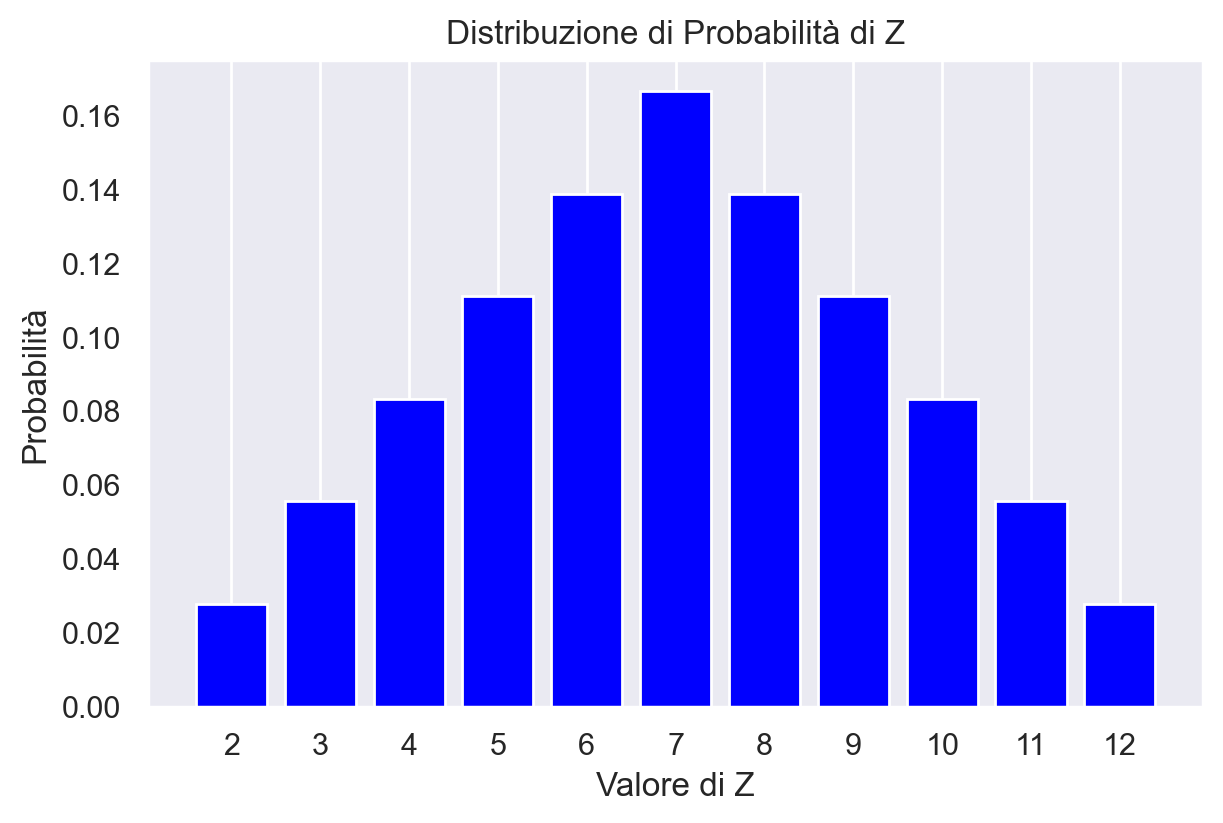

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(df['z'], df['Probability'], color='blue')
plt.xlabel('Valore di Z')
plt.ylabel('Probabilità')
plt.title('Distribuzione di Probabilità di Z')
plt.xticks(range(2, 13))  # Per mostrare tutte le etichette sull'asse x
plt.grid(axis='y')
plt.show()

Nel corso di questo esercizio, abbiamo calcolato le probabilità determinando il numero di casi favorevoli, cioè le occorrenze di ogni possibile somma $D_1 + D_2$, all'interno dello spazio campionario dell'esperimento di lancio di due dadi. Queste probabilità si ottengono dividendo il numero di tali occorrenze per il numero totale di combinazioni possibili nello spazio campionario. In termini formali, la probabilità di ogni valore specifico di $ Z $ è indicata come $ P_Z(z) = P(Z = z) $, dove $ P_Z(z) $ rappresenta "la probabilità che la variabile casuale $ Z $ assuma il valore $ z $". La funzione che associa a ogni valore $ u $ di $ Z $ la probabilità dell'evento $ Z = u $ è nota come *funzione di massa di probabilità* della variabile casuale $ Z $.

Questa funzione, $ p_Z $, è definita per ciascun valore possibile di $ Z $ come segue:

$$
\begin{array}{rclll}
p_Z(2) & = & 1/36, \\
p_Z(3) & = & 2/36, \\
p_Z(4) & = & 3/36, \\
p_Z(5) & = & 4/36, \\
p_Z(6) & = & 5/36, \\
p_Z(7) & = & 6/36, \\
p_Z(8) & = & 5/36, \\
p_Z(9) & = & 4/36, \\
p_Z(10) & = & 3/36, \\
p_Z(11) & = & 2/36, \\
p_Z(12) & = & 1/36. \\
\end{array}
$$

Ogni variabile casuale discreta possiede una funzione di massa di probabilità unica che rispetta le seguenti proprietà:

1. La probabilità di ogni evento singolo è compresa tra 0 e 1, ovvero $ 0 \leq P(Z=z) \leq 1 $.
2. La somma delle probabilità di tutti gli eventi possibili è pari a 1, cioè $ \sum_{z \in Z} P(Z=z) = 1 $.

Se consideriamo un sottoinsieme $ A $ della variabile casuale $ Z $, la probabilità associata a $ A $ dalla distribuzione $ P_Z $ è data da:

$$
P_Z(A) = \sum_{z \in A} P(Z = z).
$$

Per esempio, per la variabile casuale $ Z $ relativa al lancio di due dadi, la probabilità che $ Z $ sia un numero dispari si calcola sommando le probabilità dei valori dispari:

$$
\begin{align}
P(\text{"Z è un numero dispari"}) &= P_Z(3) + P_Z(5) + P_Z(7) + P_Z(9) + P_Z(11) \\
&= \frac{2}{36} + \frac{4}{36} + \frac{6}{36} + \frac{4}{36} + \frac{2}{36} \\
&= \frac{18}{36} \\
&= \frac{1}{2}.
\end{align}
$$

Questa formula ci permette di calcolare la probabilità di qualsiasi sottoinsieme di $ Z $ utilizzando la distribuzione di probabilità $ P_Z $.

### Funzione di Ripartizione per Variabili Casuali Discrete

La funzione di ripartizione di una variabile casuale discreta, come $ X $, è un mezzo per calcolare la probabilità che $ X $ assuma un valore non maggiore di un certo valore $ x $. Questa funzione, indicata con $ F(x) $, cumula progressivamente le probabilità fino a $ x $, ed è definita come:

$$
F(x_k) = P(X \leq x_k) = \sum_{x_i \leq x_k} P(x_i).
$$

In questa formula, $ F(x_k) $ è la probabilità che la variabile casuale $ X $ assuma un valore minore o uguale a $ x_k $. In altre parole, $ F(x) $ fornisce la probabilità cumulativa di $ X $ fino a un dato punto $ x $.

Per il caso del lancio di due dadi e la variabile casuale $ Z $ definita come la loro somma, la funzione di ripartizione di $ Z $ può essere illustrata come segue:

```{table}
| z   | p(z)   | F(z)     |
| --- | ------ | -------- |
| 2   | 1/36   | 1/36     |
| 3   | 2/36   | 3/36     |
| 4   | 3/36   | 6/36     |
| 5   | 4/36   | 10/36    |
| 6   | 5/36   | 15/36    |
| 7   | 6/36   | 21/36    |
| 8   | 5/36   | 26/36    |
| 9   | 4/36   | 30/36    |
| 10  | 3/36   | 33/36    |
| 11  | 2/36   | 35/36    |
| 12  | 1/36   | 36/36    |
```

In questa tabella, $ F(z) $ rappresenta la funzione di ripartizione cumulativa per ciascun valore $ z $. Questo aiuta a comprendere la distribuzione cumulativa delle probabilità per la variabile casuale $ Z $ nel contesto del lancio dei due dadi.

### Trovare la probabilità con una simulazione 

La distribuzione di probabilità che abbiamo precedentemente calcolato per il lancio dei due dadi è corretta, ma esiste un altro metodo per ottenere un risultato molto simile attraverso la simulazione. Questo metodo implica la generazione di un elevato numero di ripetizioni dell'esperimento casuale e l'analisi delle frequenze relative dei risultati ottenuti. In altre parole, simulando l'esperimento numerose volte, possiamo approssimare la distribuzione di probabilità empirica, che si avvicina sempre di più alla distribuzione teorica man mano che il numero di ripetizioni aumenta. Questo approccio è comune in statistica ed è particolarmente utile quando la distribuzione di probabilità teorica non è facilmente calcolabile o è troppo complessa per essere gestita in modo analitico.

Nel capitolo {ref}`intro-python-notebook` abbiamo visto come creare una funzione che ritorna il risultato del lancio di un dado:

In [22]:
def roll_die():
    """
    returns a random int between 1 and 6
    """
    return rng.choice([1, 2, 3, 4, 5, 6])

Possiamo ora definire una funzione che ritorna la somma dei punti prodotti dal lancio di due dadi. La funzione ha come argomento il numero di ripetizioni di questo esperimento casuale.

In [24]:
def roll_two_dice(n):
    """
    returns a random int between 2 and 12
    """
    rolls = []
    for i in range(n):
        two_dice = roll_die() + roll_die()
        rolls.append(two_dice)
    return rolls


Eseguiamo 100,000 ripetizioni dell'esperimento casuale e memorizzo i risultati ottenuti.

In [25]:
nrolls = 100000
res = roll_two_dice(nrolls)
print(*res[1:50])

7 9 6 3 10 10 10 5 9 7 8 9 8 7 5 5 7 11 6 6 8 7 9 10 7 6 4 5 10 11 9 5 9 4 7 4 8 4 9 9 6 9 3 10 8 9 8 7 5


Creiamo un DataFrame che contiene la variabile `y` corrispondente ai risultati delle 10,000 ripetizioni dell'esperimento casuale.

In [26]:
df = pd.DataFrame()
df["y"] = res 

Utilizziamo dunque il metodo `value_counts()`, che può essere applicato a un DataFrame, come abbiamo visto nel capitolo {ref}`freq-distr-notebook`, per trovare le frequenze assolute di ciascuno dei possibili risultati dell'esperimento casuale (cioè, 2, 3, ..., 12). Dividendo per il numero totale delle ripetizioni, otterremo una stima empirica della probabilità. Si noti che i risultati saranno simili a quelli teorici ottenuti in precedenza.

In [27]:
abs_freqs = df["y"].value_counts().sort_index()
px = abs_freqs / nrolls
list(zip(list(range(2, 13)), px))

[(2, 0.0279),
 (3, 0.05467),
 (4, 0.083),
 (5, 0.11032),
 (6, 0.13932),
 (7, 0.16827),
 (8, 0.13834),
 (9, 0.11061),
 (10, 0.08499),
 (11, 0.05482),
 (12, 0.02776)]

### Il problema del compleanno

Consideriamo ora il famoso paradosso del compleanno, anche noto come problema del compleanno, che è un curioso risultato della teoria della probabilità introdotto da Richard von Mises nel 1939. Questo paradosso afferma che la probabilità che almeno due persone in un gruppo abbiano la stessa data di compleanno è notevolmente più alta di quanto ci si potrebbe aspettare intuitivamente. Ad esempio, in un gruppo di sole 23 persone, la probabilità che almeno due di loro abbiano lo stesso compleanno è di circa il 51%, mentre con 30 persone questa probabilità supera il 70% e con 50 persone raggiunge addirittura il 97%. Questo esempio mette in evidenza come le nostre intuizioni possano essere fuorvianti quando si tratta di calcolare la probabilità di eventi rari o improbabili.

La soluzione matematica al problema del compleanno è data dalla seguente formula:

$$
P(p)=1-{\frac  {364!}{365^{{p-1}}(365-p)!}},
$$

dove $P(p)$ rappresenta la probabilità che almeno due persone abbiano lo stesso compleanno in un gruppo di $p$ persone. La spiegazione dettagliata può essere trovata su Wikipedia o in altre fonti di teoria delle probabilità.

Tuttavia, esiste anche un metodo più semplice per risolvere il problema del compleanno, che consiste nell'utilizzare una simulazione. Questo approccio coinvolge la scrittura di codice per simulare un gran numero di gruppi di persone e controllare quanti di essi hanno almeno due persone con la stessa data di compleanno. Il codice di esempio può essere trovato nel libro "Introduction to Computation and Programming Using Python" di {cite:t}`guttag2021introduction` e in altre risorse. 

In [17]:
def same_date(num_people, num_same):
    # initialize list from 0 to 365
    possible_dates = range(366)
    # list of zeros
    birthdays = [0] * 366
    # increments by 1 the days corresponding to to the randomly chosen
    # birthdays of num_people individuals
    for p in range(num_people):
        birth_date = rng.choice(possible_dates)
        birthdays[birth_date] += 1
    # True if at least one day records a number of birthdays >= num_same;
    # False otherwise
    return max(birthdays) >= num_same


def birthday_prob(num_people, num_same, num_trials):
    num_hits = 0
    # repeat the simulation num_trials times
    for t in range(num_trials):
        # if same_date() returns True, then increment num_hits by 1
        if same_date(num_people, num_same):
            num_hits += 1
    return num_hits / num_trials


for num_people in [10, 23, 30]:
    print(
        "For",
        num_people,
        "est. prob. of a shared birthday is",
        birthday_prob(num_people, 2, 10000),
    )
    numerator = math.factorial(366)
    denom = (366**num_people) * math.factorial(366 - num_people)
    print("Actual prob. for N = 100 =", 1 - numerator / denom)


For 10 est. prob. of a shared birthday is 0.1203
Actual prob. for N = 100 = 0.1166454118039999
For 23 est. prob. of a shared birthday is 0.5122
Actual prob. for N = 100 = 0.5063230118194599
For 30 est. prob. of a shared birthday is 0.707
Actual prob. for N = 100 = 0.7053034120089917


Si noti che sia la formula che la simulazione sono approssimazioni, poiché entrambe assumono che i compleanni siano egualmente probabili in tutti i giorni dell'anno, cosa che non è verificata nella realtà, come mostrato nella figura successiva.

```{image} ../images/birthdays.png
:height: 420px
:align: center
```

In questo caso, così come in tutti gli altri in cui si utilizzano modelli probabilistici per descrivere fenomeni empirici, è importante tenere presente che la risposta ottenuta è plausibile solo se le assunzioni fatte nei modelli riflettono correttamente i vincoli e le caratteristiche del mondo reale. Le probabilità e le previsioni derivate da tali modelli sono valide solo nella misura in cui le ipotesi sottostanti sono realistiche e pertinenti al contesto specifico.

### La Legge dei Grandi Numeri

La *legge dei grandi numeri* è un principio fondamentale nella teoria della probabilità che illustra come la precisione della stima della probabilità di un evento, indicata come $P(Y=y)$, si modifichi all'aumentare delle ripetizioni di un esperimento aleatorio. Per visualizzare questo, possiamo monitorare la stima di probabilità per ogni incremento nel numero di ripetizioni $m$, da 1 fino a un valore massimo $M$. Questo approccio ci fornisce una dimostrazione empirica di questo importante teorema.

Il teorema stabilisce che, incrementando il numero di volte in cui un esperimento casuale viene ripetuto, la media dei risultati osservati tende a convergere verso il valore atteso teorico della variabile aleatoria. Questo significa che, con un numero sempre maggiore di tentativi, la media empirica dei risultati si avvicina progressivamente al valore medio teorico predetto dalla teoria delle probabilità.

L'importanza di questo fenomeno sta nel fatto che, con un numero adeguatamente elevato di ripetizioni, la probabilità stimata di un evento si affina, diventando sempre più vicina alla probabilità teorica. Questa è una garanzia fondamentale che collega le osservazioni empiriche alle leggi teoriche della probabilità.

Dal punto di vista della statistica e dell'inferenza, la legge dei grandi numeri è cruciale perché fornisce un supporto robusto all'impiego di modelli probabilistici per descrivere fenomeni reali. Essa assicura che, nonostante le variazioni casuali che possono manifestarsi in singole osservazioni, la tendenza a lungo termine di un grande numero di ripetizioni rifletterà con precisione le leggi probabilistiche.

Formalmente, considerando una sequenza di variabili casuali indipendenti $X_1, X_2, \ldots, X_n$, ciascuna con una media $\mu$, la legge dei grandi numeri afferma che:

$$
\lim_{{n \to \infty}} P\left(\left|\frac{X_1 + X_2 + \ldots + X_n}{n} - \mu\right| < \epsilon\right) = 1,
$$

dove $\epsilon$ è un valore positivo arbitrariamente piccolo e $P(\cdot)$ rappresenta la probabilità. Ciò significa che, con un numero elevato di ripetizioni, la stima empirica della media campionaria diventerà sempre più vicina al valore medio atteso teorico, permettendo di trarre conclusioni affidabili sulla probabilità degli eventi in esame.

Faccaimo un esempio conceto. Mediante il seguente codice, effettuiamo una simulazione di una serie di lanci di un dado a sei facce. Generiamo casualmente numeri interi compresi tra 1 e 6 per simulare ciascun lancio. Teniamo traccia della somma cumulativa dei lanci e del numero di lanci effettuati. Ad ogni passaggio, calcoliamo il valore medio dividendo la somma cumulativa per il numero di lanci. Infine, visualizziamo il valore medio dopo ogni lancio, insieme a una linea orizzontale che indica il valore atteso di 3.5, che rappresenta la media dei punti per un dado a sei facce.

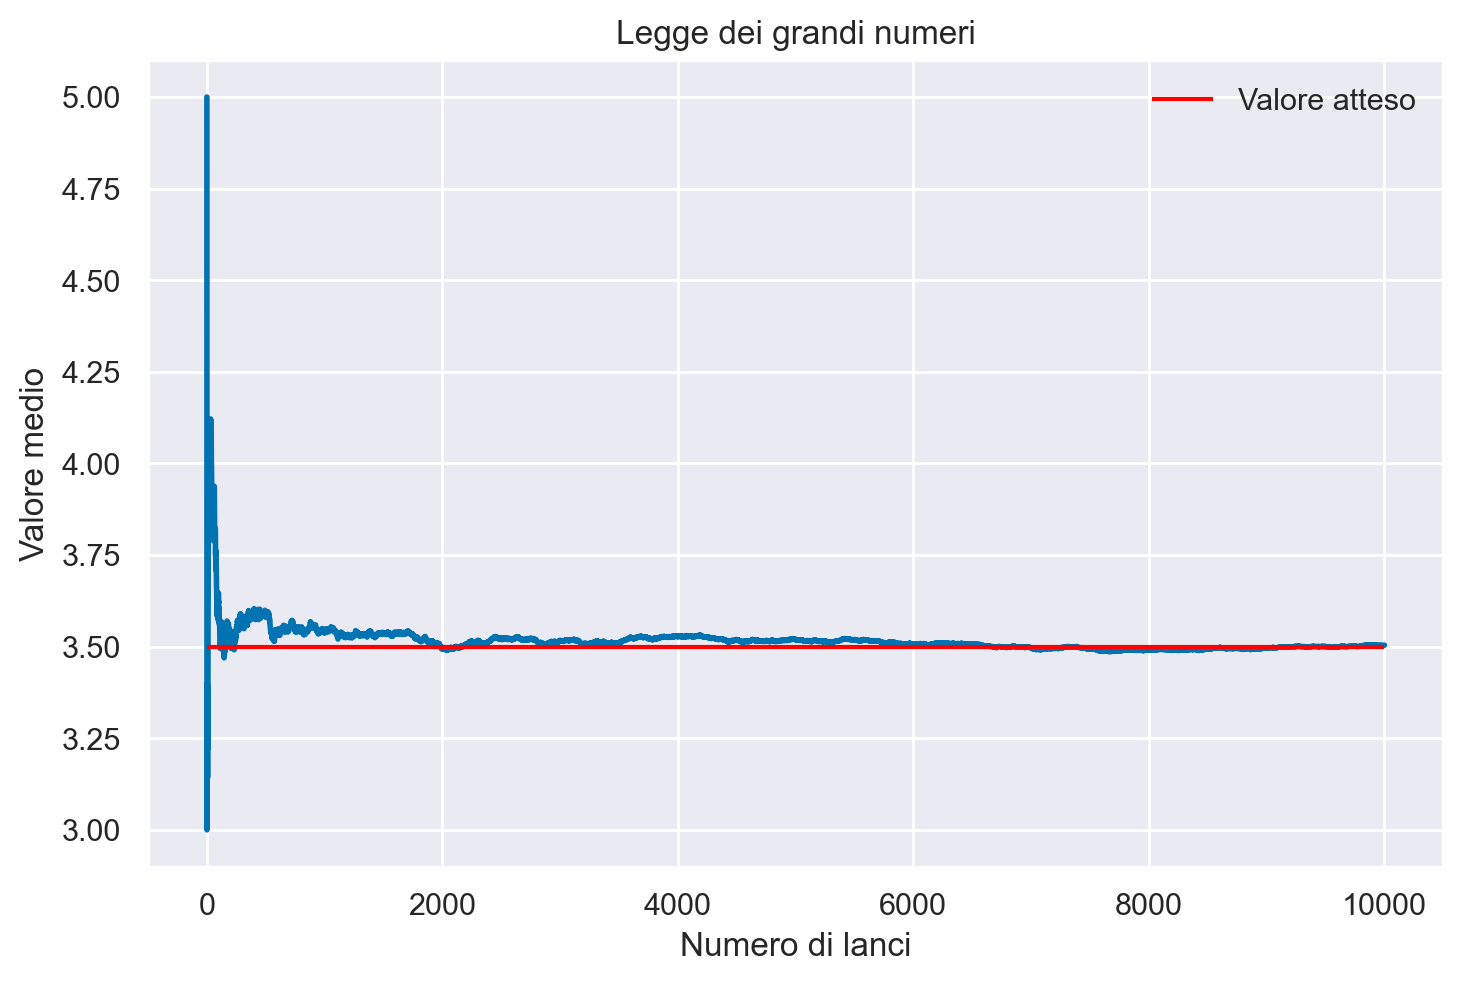

In [18]:
def simulate_dice_rolls(num_rolls):
    """Simulate dice rolls and return the average value for each roll."""
    total = 0
    averages = []
    for i in range(1, num_rolls + 1):
        roll = roll_die()
        total += roll
        averages.append(total / i)
    return averages


def plot_dice_rolls(averages, num_rolls):
    """
    Plot the average value after each dice roll.
    """
    x = range(1, num_rolls + 1)
    plt.plot(x, averages, linewidth=2)
    plt.hlines(y=3.5, xmin=0, xmax=num_rolls, color="red", label="Valore atteso")
    plt.xlabel("Numero di lanci")
    plt.ylabel("Valore medio")
    plt.title("Legge dei grandi numeri")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    num_rolls = 10000
    averages = simulate_dice_rolls(num_rolls)
    plot_dice_rolls(averages, num_rolls)


## Commenti e considerazioni finali

In questo capitolo, abbiamo esplorato i fondamenti della teoria delle probabilità, tra cui la costruzione dello spazio campione per gli esperimenti casuali e le proprietà fondamentali della probabilità. Abbiamo imparato a calcolare le probabilità degli eventi in uno spazio campione discreto e utilizzato funzioni di ripartizione e di massa di probabilità per le variabili casuali. Inoltre, abbiamo introdotto il concetto di simulazione come metodo per approssimare le distribuzioni di probabilità empiriche quando non è possibile ottenere soluzioni analitiche.

La teoria delle probabilità è essenziale per la statistica e ha diverse applicazioni pratiche, tra cui la psicologia. Comprendere le probabilità ci consente di prendere decisioni informate in situazioni incerte e di sviluppare previsioni affidabili. Con una solida comprensione delle nozioni di base della probabilità, possiamo affrontare una vasta gamma di problemi e prendere decisioni basate sulla probabilità dei risultati possibili. Tuttavia, è fondamentale ricordare che i modelli probabilistici sono solo approssimazioni della realtà e possono essere influenzati da semplificazioni e limitazioni dei dati disponibili. Pertanto, è importante esercitare cautela nell'interpretazione dei risultati e comprendere le assunzioni alla base delle analisi.

## Esercizio

Utilizzando il file condiviso su Google Drive, ogni studente inserirà il proprio nome e la data di compleanno nel formato specificato. Successivamente, il file Excel con i dati verrà importato in Python. L'obiettivo del problema è confrontare la predizione teorica calcolata risolvendo il "paradosso del compleanno" con i dati effettivamente ottenuti dagli studenti. Questo problema ci permetterà di confrontare la teoria con i dati reali e di analizzare quanto sia probabile che ci siano studenti con compleanni uguali all'interno della classe. Di seguito, trovate un esempio di come contare il numero di compleanni uguali utilizzando il codice Python.

In [20]:
def count_same_birthdays(birthday_list):
    same_birthdays = {}
    for name, birthday in birthday_list:
        if birthday in same_birthdays:
            same_birthdays[birthday].append(name)
        else:
            same_birthdays[birthday] = [name]

    return same_birthdays


# Example input with 5 students
birthday_list = [
    ("Mario Rossi", "agosto 3"),
    ("Giovanna Bianchi", "agosto 3"),
    ("Maria Neri", "agosto 3"),
    ("Francesco Ferrari", "giugno 12"),
    ("Alice Esposito", "maggio 26"),
    ("Giovanna Romano", "giugno 12"),
    ("Maria Gallo", "agosto 3"),
]

same_birthdays = count_same_birthdays(birthday_list)

# Print shared birthdays
for birthday, students in same_birthdays.items():
    if len(students) > 1:
        print(f"Compleanno {birthday}: {', '.join(students)}")

Compleanno agosto 3: Mario Rossi, Giovanna Bianchi, Maria Neri, Maria Gallo
Compleanno giugno 12: Francesco Ferrari, Giovanna Romano


Altri esercizi sulla probabilità discreta sono proposti nell'appendice {ref}`discr-prob-appendix`.

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Mon Jan 22 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pandas    : 2.1.4
arviz     : 0.17.0
scipy     : 1.11.4
seaborn   : 0.13.0
numpy     : 1.26.2
matplotlib: 3.8.2

Watermark: 2.4.3

